# GRIP: The Sparks Foundation 

# Data Science and Business Analytics Intern (GRIP July 2021)

# Task 1: Prediction using Supervised ML

## Problem Statement:Predict the percentage of an student based on the no. of study hours.

# Nidhi Kochar

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#reading the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
#Printing the first 5 rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory data analysis

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
#to print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#to find the number of columns and rows
df.shape

(25, 2)

# Outlier Removal

In [9]:
def null_detection(df):
    num_cols = []
    
    count = 0
    t=[]
    for i in num_cols:
        z=np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index' , axis=1)
    print(count)
    return df

In [10]:
df = null_detection(df)

0


Hence there is no outlier in the dataset

#  Visualizing the dataset

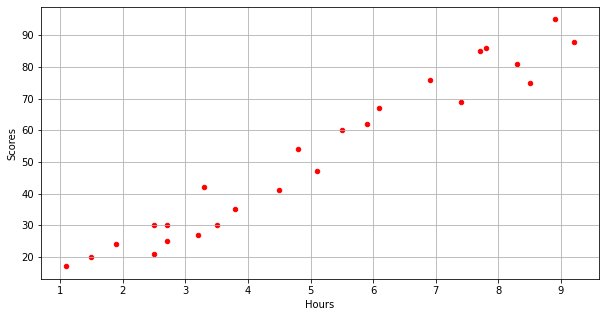

In [12]:
#plotting the dataset
plt.rcParams["figure.figsize"] = [10,5]
df.plot(kind='scatter' , x='Hours' , y ='Scores',style = '*', color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

In [13]:
#determining the correlation between the variables
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
df.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


There is a positive relationship between the two variables that means as the number of hours increasing the score is also increasing.Therefore we can train our data for predictions by the concept of linear regression.

# Data Preparation

In [15]:
#using iloc function we will divide the data
X = df.iloc[: ,:1].values
Y = df.iloc[: , 1:].values

# Training and Testing dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train, Y_test = train_test_split(X , Y ,test_size=0.2 ,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , Y_train)

LinearRegression()

# Visualizing the model

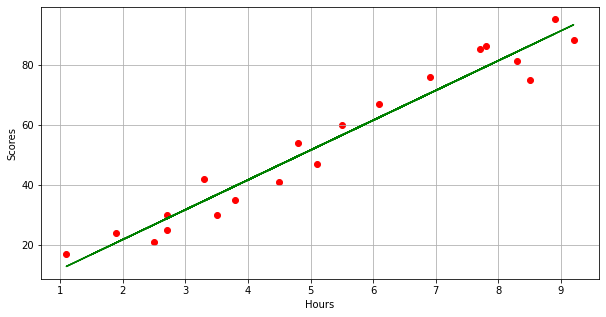

In [19]:
line = model.coef_*X + model.intercept_
plt.rcParams["figure.figsize"] = [10,5]
plt.scatter(X_train , Y_train , color = 'red')
plt.plot(X ,line , color= 'green');
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

# Making Predictions

In [20]:
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [22]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [23]:
#comparing Actual vs Predicted
comp = pd.DataFrame({'Actual' : [Y_test], 'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [30]:
#Testing with my data
hours = 9.25
my_pred = model.predict([[hours]])
print("The predicted score if a person studies for ", hours ,"hours is ",my_pred[0])

The predicted score if a person studies for  9.25 hours is  [93.69173249]


# CONCLUSION:

__Since the model predicted results are closer and similiar to actual ones for a student studying 9.5 hours their prdeicted score is 93.69% which can be considered closer to what actual would have been,hence we conclude our m odel is effctively good and precise__.

In [26]:
#Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# THANK YOU